In [9]:
#
import pandas
from statsmodels.tsa.seasonal import MSTL
from matplotlib import pyplot

#
from pmdarima import arima
import pmdarima as pm
from pmdarima import datasets
from pmdarima import utils

#


In [10]:
driver = 'JTU5300QUL'
# driver = 'QUSR628BIS'
# driver = 'RAILFRTCARLOADSD11'
# driver = 'FRGSHPUSM649NCIS'
# driver = 'TSIFRGHT'
# driver = 'AIRRTMFMD11'
# driver = 'CUUR0000SEHA'
series = pandas.read_csv('./data/{0}.csv'.format(driver))
# series = data[[driver]].copy()
# series = series.reset_index().rename(columns={'jx': 'ds', driver: 'y'})
series = series.rename(columns={'DATE': 'ds', driver: 'y'})
series['ds'] = pandas.to_datetime(series['ds'])
series['y'] = series['y'].apply(func=lambda x: pandas.NA if x == '.' else x)
series['y'] = series['y'].ffill()
series['y'] = pandas.to_numeric(series['y'])
series = series[series['ds'] > '1970-01-01']
# series['y'] = series['y'].pct_change()
# series = series[series['ds'] > '2000-01-01']
series

,ds,y
0,2000-12-01,50
1,2001-01-01,80
2,2001-02-01,29
3,2001-03-01,28
4,2001-04-01,52
...,...,...
266,2023-02-01,42
267,2023-03-01,44
268,2023-04-01,56
269,2023-05-01,39


In [11]:
# series.set_index('ds').iloc[80:120, :].plot(style='.')  # '.-'

<Axes: xlabel='ds'>

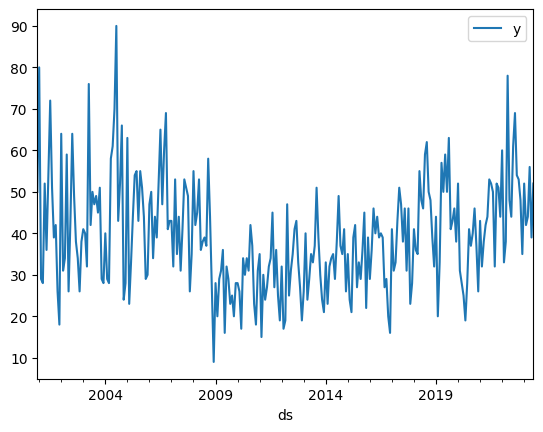

In [32]:
series.set_index('ds').plot(style='-')  # '.-'

ValueError: zero-size array to reduction operation maximum which has no identity

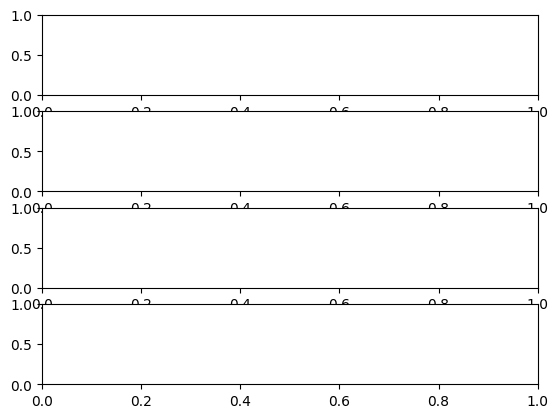

In [23]:
th = 0.5
ix = int((series.shape[0] - 1) * th)
x_dev, x_test = series['y'].values[:ix], series['y'].values[ix:-1]
y_dev, y_test = series['y'].values[1:ix+1], series['y'].values[ix+1:]
f = 4
ixx = int(int(ix * th) / (f + 1))
fig, ax = pyplot.subplots(f, 1)
for j in range(f + 1):
    x_train, x_val = x_dev[ixx * j:ixx * (j+1)], x_dev[ixx * (j+1):ixx * (j+2)]
    tt_train = list(range(x_train.shape[0]))
    tt_val = list(range(x_val.shape[0]))

    preds, conf_int_low, conf_int_up = [], [], []
    """
    modl = pm.auto_arima(x_train, 
                         start_p=1, start_q=1, start_P=1, start_Q=1,
                         max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                         stepwise=True, suppress_warnings=True, D=1, max_D=10,
                         error_action='ignore')
    """
    modl = pm.auto_arima(x_train, 
                         start_p=1, start_q=1,
                         max_p=5, max_q=5, m=12,
                         start_P=1, seasonal=True,
                         trace=True,
                         d=1,
                         stepwise=True, suppress_warnings=True, 
                         # D=0, max_D=1,
                         # d=0, max_d=1,
                         error_action='ignore')
    for i in range(x_val.shape[0]):
        """
        modl = pm.auto_arima(x_subdev[i:x_train.shape[0]+i], 
                             start_p=1, start_q=1, start_P=1, start_Q=1,
                             max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                             stepwise=True, suppress_warnings=True, D=1, max_D=10,
                             error_action='ignore')
        """
        
        # Create predictions for the future, evaluate on test
        prd, cof = modl.predict(n_periods=1, return_conf_int=True)
        preds.append(prd[0])
        conf_int_low.append(cof[0][0])
        conf_int_up.append(cof[0][1])
        modl.update(x_val[i])
        print(prd)
        print(cof)

ValueError: zero-size array to reduction operation maximum which has no identity

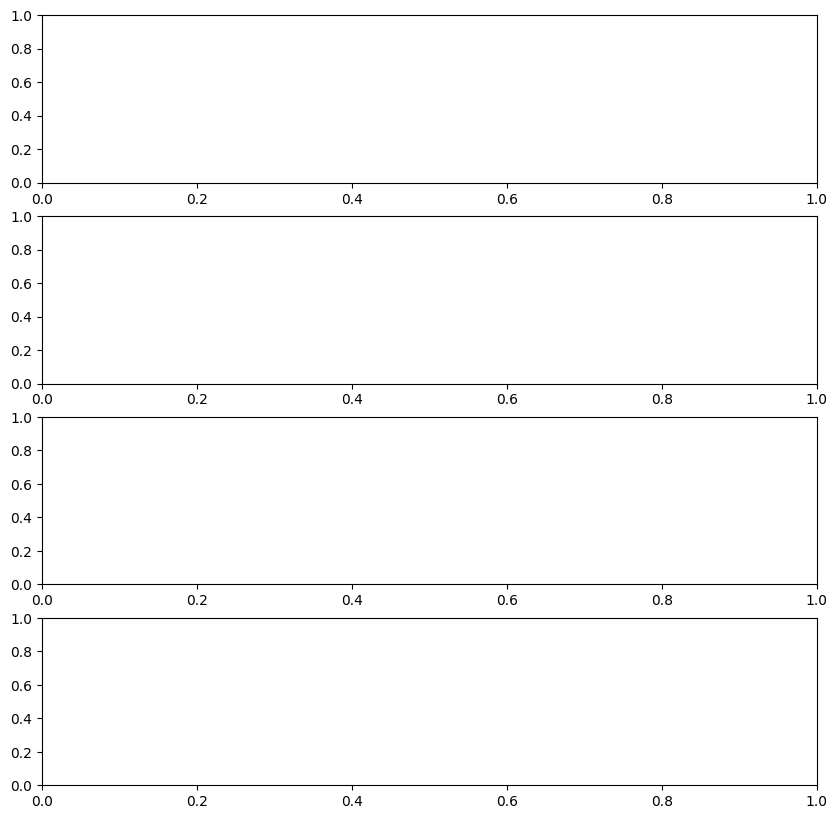

In [48]:
th = 0.5
ix = int((series.shape[0] - 1) * th)
x_dev, x_test = series['y'].values[:ix], series['y'].values[ix:-1]
y_dev, y_test = series['y'].values[1:ix+1], series['y'].values[ix+1:]
f = 4
ixx = int(int(ix * th) / (f + 1))
fig, ax = pyplot.subplots(f, 1, figsize=(10, 10))
for j in range(f):
    x_train, x_val = x_dev[ixx * j:ixx * (j+1)], x_dev[ixx * (j+1):ixx * (j+2)]
    tt_train = [x for x in range(x_train.shape[0])]
    tt_val = [x + x_train.shape[0] for x in range(x_val.shape[0])]

    preds, conf_int_low, conf_int_up = [], [], []
    """
    modl = pm.auto_arima(x_train, 
                         start_p=1, start_q=1, start_P=1, start_Q=1,
                         max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                         stepwise=True, suppress_warnings=True, D=1, max_D=10,
                         error_action='ignore')
    """
    # """
    modl = pm.auto_arima(x_train, 
                         start_p=1, start_q=1,
                         max_p=5, max_q=5, # m=12,
                         # start_P=0, max_P=5,
                         # start_Q=0, max_Q=5,
                         seasonal=True,
                         trace=True,
                         stepwise=False, suppress_warnings=True, 
                         # start_D=0, max_D=1,
                         start_d=0, max_d=1,
                         random=True,
                         # D=0, d=2,
                         m=12,
                         max_order=None,
                         error_action='ignore')
    # """
    """
    modl = pm.auto_arima(x_train, # m=12, 
                         seasonal=True,
                         trace=True,
                         stepwise=True, suppress_warnings=True, 
                         # D=0, max_D=1,
                         # d=0, max_d=1,
                         error_action='ignore')
    """
    for i in range(x_val.shape[0]):
        """
        modl = pm.auto_arima(x_subdev[i:x_train.shape[0]+i], 
                             start_p=1, start_q=1, start_P=1, start_Q=1,
                             max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                             stepwise=True, suppress_warnings=True, D=1, max_D=10,
                             error_action='ignore')
        """
        
        # Create predictions for the future, evaluate on test
        prd, cof = modl.predict(n_periods=1, return_conf_int=True)
        preds.append(prd[0])
        conf_int_low.append(cof[0][0])
        conf_int_up.append(cof[0][1])
        modl.update(x_val[i])
    ax[j].plot(tt_train + [tt_val[0]], x_train.tolist() + [x_val[0]], 'black')
    ax[j].plot(tt_val, x_val, 'navy')
    ax[j].plot(tt_val, preds, 'orange')
    ax[j].fill_between(tt_val, conf_int_low, conf_int_up)
    


"""
decomposed = arima.decompose(series['y'].values, 'additive', m=48)
# decomposed = arima.decompose(series['y'].values, 'multiplicative', m=48)
figure_kwargs = {'figsize': (6, 6)}  # set figure size for both examples
# Plot the decomposed signal of ausbeer as a subplot

axes = utils.decomposed_plot(decomposed, figure_kwargs=figure_kwargs,
                             show=False)
axes[0].set_title("Ausbeer Seasonal Decomposition")
"""
# who?

In [17]:
x_train

array([50, 80, 29, 28, 52, 36, 54, 72, 51, 39, 42, 26, 18], dtype=int64)

In [ ]:
th = 0.5
ix = int((series.shape[0] - 1) * th)
x_dev, x_test = series['y'].values[:ix], series['y'].values[ix:-1]
y_dev, y_test = series['y'].values[1:ix+1], series['y'].values[ix+1:]
f = 4
ixx = int(int(ix * th) / (f + 1))
fig, ax = pyplot.subplots(f, 1)

modl = pm.auto_arima(x_train, 
                     start_p=1, start_q=1,
                         max_p=5, max_q=5, m=12,
                         start_P=0, seasonal=True,
                         trace=True,
                         stepwise=True, suppress_warnings=True, 
                         # D=0, max_D=1,
                         # d=0, max_d=1,
                         error_action='ignore')
modl.update(x_val)
for i in range(x_test.shape[0]):
    """
    modl = pm.auto_arima(x_subdev[i:x_train.shape[0]+i], 
                         start_p=1, start_q=1, start_P=1, start_Q=1,
                         max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                         stepwise=True, suppress_warnings=True, D=1, max_D=10,
                         error_action='ignore')
    """
    
    # Create predictions for the future, evaluate on test
    prd, cof = modl.predict(n_periods=1, return_conf_int=True)
    preds.append(prd[0])
    conf_int_low.append(cof[0][0])
    conf_int_up.append(cof[0][1])
    modl.update(x_test[i])
ax[j].plot(tt_train, x_train, 'black')
ax[j].plot(tt_val, x_val, 'grey')
ax[j].plot(tt_test, x_test, 'navy')
ax[j].plot(tt_test, preds, 'orange')
ax[j].fill_between(tt_test, conf_int_low, conf_int_up)



In [ ]:
from matplotlib import pyplot
fig, ax = pyplot.subplots()
start, end = 0, 100
tt, x, trend, seasonal = list(range(end-start)), decomposed.x[start:end], decomposed.trend[start:end], decomposed.seasonal[start:end]
ax.plot(tt, x)
ax.plot(tt, trend, 'orange')
ax_sec = ax.twinx()
ax_sec.plot(tt, seasonal, 'green')

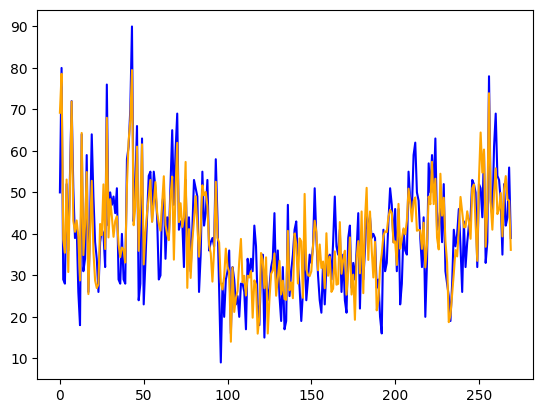

In [88]:
start, end = 0, -1
x = decomposed.x[start:end]
seasonal = decomposed.seasonal[start:end]
deseason = x - seasonal
tt = list(range(len(deseason)))
pyplot.plot(tt, x, 'blue')
pyplot.plot(tt, deseason, 'orange')

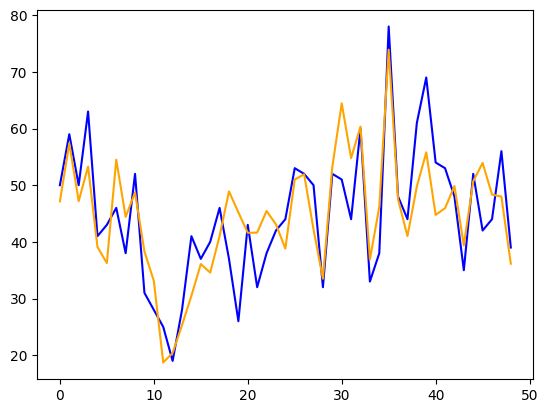

In [89]:
start, end = -50, -1
x = decomposed.x[start:end]
seasonal = decomposed.seasonal[start:end]
deseason = x - seasonal
tt = list(range(len(deseason)))
pyplot.plot(tt, x, 'blue')
pyplot.plot(tt, deseason, 'orange')

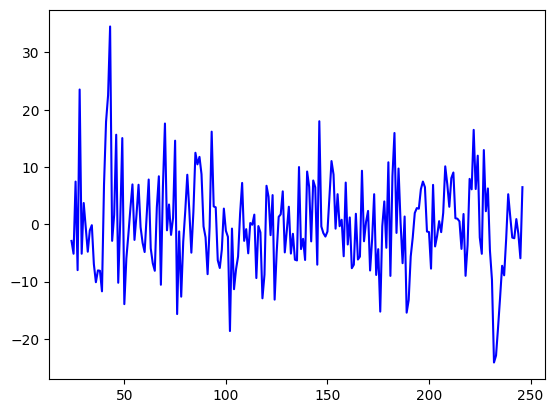

In [90]:
start, end = 0, -1
resid = decomposed.random[start:end]
tt = list(range(len(resid)))
pyplot.plot(tt, resid, 'blue')